## 1. import

In [1]:
import pandas as pd
import math
import numpy as np
from konlpy.tag import Okt
okt=Okt()
from sklearn.feature_extraction.text import TfidfVectorizer

In [2]:
df = pd.read_csv("test_data.csv")

In [3]:
df

,date,star_point,comment,photo
0,21.01.15.,5,12월 22일 사전예약으로 구매하여 1월 14일 배송받았습니다.\n예정일보다 제품수...,['https://phinf.pstatic.net/image.nmv/shopnbuy...
1,21.05.02.,3,사용목적은 업무용으로 사용하려고 구매했습니다. 우선 판매자 분이 NVMe 256GB...,['https://shopping-phinf.pstatic.net/20210504_...
2,21.01.27.,5,지난달부터 가볍고 성능좋은 노트북을 구매하기 위해 엄청나게 검색에 검색... 폭풍검...,['https://phinf.pstatic.net/image.nmv/shopnbuy...
3,21.01.15.,5,처음에 1/18일까지 배송해준다고 써있었는데 그때까지 기다리다 목이 빠질 것 같아서...,['https://phinf.pstatic.net/image.nmv/shopnbuy...
4,21.02.03.,5,일단 주문하고 이틀만에 받았습니다.\n4년동안 사용했던 노트북과는 이별을 고하면서\...,['https://phinf.pstatic.net/image.nmv/shopnbuy...
...,...,...,...,...
95,21.01.19.,3,"18일 이후 출고라고 알았으나, 13일에 와서 좋았음. 다른 곳에서 구매한 사람들은...",[]
96,21.04.29.,5,노트북 포장이 간소해서 놀랬어요. 노트북 겉 박스 케이스도 예쁘고 딱 들어있을것만 ...,['https://phinf.pstatic.net/image.nmv/shopnbuy...
97,20.12.18.,5,2020 노트북 시장에서 가장 주목할만한 점은 바로 갤럭시북 이온의 등장이었습니다....,[]
98,21.02.04.,5,노트북을 사기까지 한달 걸렸네요.. 참 힘든 여정이었습니다.\n사전예약이었다면 갤럭...,['https://phinf.pstatic.net/checkout/20210204_...


---

## 2. Bag of Words Method

In [4]:
negative = df[df["star_point"] <= 2]

In [5]:
neural = df[df["star_point"] == 3]

In [6]:
positive = df[df["star_point"] >= 4]

In [7]:
neural

,date,star_point,comment,photo
1,21.05.02.,3,사용목적은 업무용으로 사용하려고 구매했습니다. 우선 판매자 분이 NVMe 256GB...,['https://shopping-phinf.pstatic.net/20210504_...
61,21.03.09.,3,"정말 오랫동안 고민 많이하고 선택하였습니다.\n화질도 만족, 성능도 만족, 그리고 ...",['https://phinf.pstatic.net/image.nmv/shopnbuy...
77,21.02.11.,3,"장점:외장 그래픽 탑재했음에도 불구하고 가벼운 무게, 발열 성능 우수하며 오버워치 ...",[]
95,21.01.19.,3,"18일 이후 출고라고 알았으나, 13일에 와서 좋았음. 다른 곳에서 구매한 사람들은...",[]


In [8]:
# corpus = corpus.train[0:500].text
corpus = df["comment"].values

In [9]:
len(corpus) == len(df)

True

In [10]:
tag_list = ["NNG", "NNP"]

In [10]:
# 단어의 극성을 구분
pos_tagged = []
for i, sentence in enumerate(corpus):
    dic = {}
    dic["words"] = okt.pos(sentence, norm=True, stem=True)
    if df.loc[i,"star_point"] >= 4:
         dic["sentiment"] = 1
    if df.loc[i,"star_point"] <= 3:
         dic["sentiment"] = -1
    pos_tagged.append(dic)

In [11]:
pos_tagged[:3]

[{'words': [('12월', 'Number'),
   ('22일', 'Number'),
   ('사전예약', 'Noun'),
   ('으로', 'Josa'),
   ('구매', 'Noun'),
   ('하다', 'Verb'),
   ('1월', 'Number'),
   ('14일', 'Number'),
   ('배송', 'Noun'),
   ('받다', 'Verb'),
   ('.', 'Punctuation'),
   ('\n', 'Foreign'),
   ('예정일', 'Noun'),
   ('보다', 'Josa'),
   ('제품', 'Noun'),
   ('수령', 'Noun'),
   ('이', 'Josa'),
   ('다소', 'Noun'),
   ('늦어지다', 'Verb'),
   ('감다', 'Verb'),
   ('있다', 'Adjective'),
   ('.', 'Punctuation'),
   ('꼼꼼하다', 'Adjective'),
   ('포장', 'Noun'),
   ('되어다', 'Verb'),
   ('받다', 'Verb'),
   ('보다', 'Verb'),
   ('제품', 'Noun'),
   ('은', 'Josa'),
   ('사용', 'Noun'),
   ('해보다', 'Verb'),
   ('결과', 'Noun'),
   ('너무', 'Adverb'),
   ('만족하다', 'Adjective'),
   ('.', 'Punctuation'),
   ('\n', 'Foreign'),
   ('매장', 'Noun'),
   ('에서', 'Josa'),
   ('업무', 'Noun'),
   ('용', 'Noun'),
   ('으로', 'Josa'),
   ('사용', 'Noun'),
   ('하다', 'Verb'),
   ('삼성', 'Noun'),
   ('갤럭시', 'Noun'),
   ('북', 'Noun'),
   ('이온', 'Noun'),
   ('2', 'Number'),
   ('를', 'Noun'),


In [12]:
# 단어 극성 구분 o

wordlist = []
for sentence in pos_tagged:
    sentiment = sentence["sentiment"]
    for word in sentence["words"]:
        if word[1] in ["Noun", "Adjective", "Adverb"]:
            wordlist.append(word + (sentiment,))
wordlist[:50]

[('사전예약', 'Noun', 1),
 ('구매', 'Noun', 1),
 ('배송', 'Noun', 1),
 ('예정일', 'Noun', 1),
 ('제품', 'Noun', 1),
 ('수령', 'Noun', 1),
 ('다소', 'Noun', 1),
 ('있다', 'Adjective', 1),
 ('꼼꼼하다', 'Adjective', 1),
 ('포장', 'Noun', 1),
 ('제품', 'Noun', 1),
 ('사용', 'Noun', 1),
 ('결과', 'Noun', 1),
 ('너무', 'Adverb', 1),
 ('만족하다', 'Adjective', 1),
 ('매장', 'Noun', 1),
 ('업무', 'Noun', 1),
 ('용', 'Noun', 1),
 ('사용', 'Noun', 1),
 ('삼성', 'Noun', 1),
 ('갤럭시', 'Noun', 1),
 ('북', 'Noun', 1),
 ('이온', 'Noun', 1),
 ('를', 'Noun', 1),
 ('구매', 'Noun', 1),
 ('기존', 'Noun', 1),
 ('사용', 'Noun', 1),
 ('맥북프로', 'Noun', 1),
 ('같다', 'Adjective', 1),
 ('인치', 'Noun', 1),
 ('모델', 'Noun', 1),
 ('삼성', 'Noun', 1),
 ('갤럭시', 'Noun', 1),
 ('북', 'Noun', 1),
 ('이온', 'Noun', 1),
 ('비교', 'Noun', 1),
 ('상하좌우', 'Noun', 1),
 ('사이즈', 'Noun', 1),
 ('더', 'Noun', 1),
 ('무게', 'Noun', 1),
 ('있다', 'Adjective', 1),
 ('또한', 'Noun', 1),
 ('윈도우', 'Noun', 1),
 ('전용', 'Noun', 1),
 ('모델', 'Noun', 1),
 ('아니다', 'Adjective', 1),
 ('사용', 'Noun', 1),
 ('불편하다', 'Adject

In [13]:
word_df = pd.DataFrame(wordlist, columns = ['word', 'pos', 'sentiment'])

In [14]:
word_df

,word,pos,sentiment
0,사전예약,Noun,1
1,구매,Noun,1
2,배송,Noun,1
3,예정일,Noun,1
4,제품,Noun,1
...,...,...,...
7803,한컴,Noun,1
7804,오피스,Noun,1
7805,유용하다,Adjective,1
7806,것,Noun,1


In [13]:
word2index={}
bow = []
for word in wordlist:
    if word not in word2index.keys():
        word2index[word]=len(word2index)
        bow.append([word, 1])
    else:
        index=word2index.get(word)
        bow[index] = [word, bow[index][1]+1]

In [14]:
wordlist = sorted(bow, key=lambda word: word[1], reverse=True)   

In [15]:
data = [list(row[0]) + [row[1]] for row in wordlist]

In [ ]:
data

In [18]:
word_frame = pd.DataFrame(data, columns = ["word", "pos", "sentiment", "counts"])

In [19]:
word_frame

,word,pos,sentiment,counts
0,노트북,Noun,1,231
1,좋다,Adjective,1,157
2,있다,Adjective,1,140
3,이온,Noun,1,121
4,같다,Adjective,1,97
...,...,...,...,...
2012,행사,Noun,1,1
2013,여러가지,Noun,1,1
2014,포장재,Noun,1,1
2015,감사히,Adverb,1,1


In [16]:
pos_wordlist = [word for word in wordlist if word[0][2] == 1]
neg_wordlist = [word for word in wordlist if word[0][2] == -1]

In [17]:
# stopwords = ['고기', '정말', '너무', '진짜', '이다', '구매', '같다', '아직']
stopwords = ['노트북', '있다', '같다', '없다', '이다', '아니다', '그렇다']

In [18]:
# toberemoved = ["Punctuation", "Josa", "Modifier", "Number", "Suffix", "Determiner", "VerbPrefix", "Alpha", "Verb"]
clean = ["Noun", "Adjective"]
pos_result = []
for word in pos_wordlist:
    if word[0][1] in clean and len(word[0][0]) > 1 and word[0][0] not in stopwords and word[1] > 5:
#         if(word[0][0] == "가성"): word[0] = ("가성비", "Noun", 1)
        pos_result.append(word)
pos_result

[[('좋다', 'Adjective', 1), 157],
 [('이온', 'Noun', 1), 121],
 [('사용', 'Noun', 1), 91],
 [('가볍다', 'Adjective', 1), 80],
 [('구매', 'Noun', 1), 64],
 [('갤럭시', 'Noun', 1), 64],
 [('제품', 'Noun', 1), 59],
 [('성능', 'Noun', 1), 54],
 [('생각', 'Noun', 1), 47],
 [('배송', 'Noun', 1), 45],
 [('빠르다', 'Adjective', 1), 41],
 [('삼성', 'Noun', 1), 40],
 [('화면', 'Noun', 1), 39],
 [('디자인', 'Noun', 1), 37],
 [('고민', 'Noun', 1), 35],
 [('무게', 'Noun', 1), 34],
 [('정도', 'Noun', 1), 34],
 [('처음', 'Noun', 1), 34],
 [('이번', 'Noun', 1), 32],
 [('만족하다', 'Adjective', 1), 31],
 [('속도', 'Noun', 1), 31],
 [('정말', 'Noun', 1), 31],
 [('인치', 'Noun', 1), 29],
 [('사양', 'Noun', 1), 29],
 [('포장', 'Noun', 1), 27],
 [('깔끔하다', 'Adjective', 1), 24],
 [('그래픽', 'Noun', 1), 24],
 [('비교', 'Noun', 1), 23],
 [('그램', 'Noun', 1), 23],
 [('휴대', 'Noun', 1), 22],
 [('구입', 'Noun', 1), 22],
 [('작업', 'Noun', 1), 22],
 [('선택', 'Noun', 1), 21],
 [('보드', 'Noun', 1), 21],
 [('가격', 'Noun', 1), 20],
 [('소리', 'Noun', 1), 20],
 [('많다', 'Adjective', 1), 20

In [20]:
# toberemoved = ["Punctuation", "Josa", "Modifier", "Number", "Suffix", "Determiner", "VerbPrefix", "Alpha", "Verb"]
neg_result = []
for word in neg_wordlist:
    if word[0][1] in clean and len(word[0][0]) > 1 and word[0][0] not in stopwords:
        neg_result.append(word)
neg_result

[[('좋다', 'Adjective', -1), 9],
 [('구매', 'Noun', -1), 7],
 [('혜택', 'Noun', -1), 6],
 [('소음', 'Noun', -1), 6],
 [('이온', 'Noun', -1), 6],
 [('다른', 'Noun', -1), 5],
 [('그램', 'Noun', -1), 5],
 [('화면', 'Noun', -1), 5],
 [('할인', 'Noun', -1), 4],
 [('상품', 'Noun', -1), 4],
 [('괜찮다', 'Adjective', -1), 4],
 [('선택', 'Noun', -1), 4],
 [('많다', 'Adjective', -1), 4],
 [('성능', 'Noun', -1), 4],
 [('생각', 'Noun', -1), 4],
 [('사용', 'Noun', -1), 3],
 [('갤럭시', 'Noun', -1), 3],
 [('사은', 'Noun', -1), 3],
 [('페이지', 'Noun', -1), 3],
 [('안되다', 'Adjective', -1), 3],
 [('기능', 'Noun', -1), 3],
 [('가격', 'Noun', -1), 3],
 [('발열', 'Noun', -1), 3],
 [('확실하다', 'Adjective', -1), 3],
 [('게이', 'Noun', -1), 3],
 [('통화', 'Noun', -1), 3],
 [('음질', 'Noun', -1), 3],
 [('후회', 'Noun', -1), 3],
 [('인치', 'Noun', -1), 3],
 [('마음', 'Noun', -1), 2],
 [('버즈', 'Noun', -1), 2],
 [('확인', 'Noun', -1), 2],
 [('신청', 'Noun', -1), 2],
 [('문의', 'Noun', -1), 2],
 [('기대하다', 'Adjective', -1), 2],
 [('정말', 'Noun', -1), 2],
 [('고민', 'Noun', -1), 2],


In [21]:
result = pos_result + neg_result

In [25]:
def get_std(result):
    summ, std = 0, 0
    for word in result:
        summ += word[1]
    avg = summ / len(result)
    for word in result:
        std += abs(word[1]-avg)**2
    std = std ** 0.5
    return std

In [22]:
object_list = []
for word in result:
    tmp = {}
    tmp["text"]=word[0][0]
    tmp["value"]=round((math.log(word[1]) * 20), 3)
    tmp["sentiment"] = word[0][2]
    object_list.append(tmp)
object_list

[{'text': '좋다', 'value': 101.125, 'sentiment': 1},
 {'text': '이온', 'value': 95.916, 'sentiment': 1},
 {'text': '사용', 'value': 90.217, 'sentiment': 1},
 {'text': '가볍다', 'value': 87.641, 'sentiment': 1},
 {'text': '구매', 'value': 83.178, 'sentiment': 1},
 {'text': '갤럭시', 'value': 83.178, 'sentiment': 1},
 {'text': '제품', 'value': 81.551, 'sentiment': 1},
 {'text': '성능', 'value': 79.78, 'sentiment': 1},
 {'text': '생각', 'value': 77.003, 'sentiment': 1},
 {'text': '배송', 'value': 76.133, 'sentiment': 1},
 {'text': '빠르다', 'value': 74.271, 'sentiment': 1},
 {'text': '삼성', 'value': 73.778, 'sentiment': 1},
 {'text': '화면', 'value': 73.271, 'sentiment': 1},
 {'text': '디자인', 'value': 72.218, 'sentiment': 1},
 {'text': '고민', 'value': 71.107, 'sentiment': 1},
 {'text': '무게', 'value': 70.527, 'sentiment': 1},
 {'text': '정도', 'value': 70.527, 'sentiment': 1},
 {'text': '처음', 'value': 70.527, 'sentiment': 1},
 {'text': '이번', 'value': 69.315, 'sentiment': 1},
 {'text': '만족하다', 'value': 68.68, 'sentiment':

---

In [302]:
# corpus = corpus.train[0:500].text
corpus = df["comment"].values

In [303]:
# 단어 극성 고려 x

pos_tagged = []
for sentence in corpus:
    pos_tagged.append(okt.pos(sentence, norm=True, stem=True))

In [304]:
# 단어 극성 구분 x
# string이 여러개 들어있는 list 자료형 코퍼스 만듬

corpus_list = []
for sentence in pos_tagged:
    word_list = []
    for word in sentence:
        if word[1] in ["Noun", "Adjective"] and len(word[0]) > 1:
            word_list.append(word[0])
    corpus_list.append(' '.join(word_list))

In [305]:
from sklearn.feature_extraction.text import TfidfVectorizer

tfidfv = TfidfVectorizer(ngram_range = (2, 2)).fit(corpus_list)
tfidf_table = tfidfv.transform(corpus_list).toarray()
# print(tfidfv.vocabulary_)

In [ ]:
arg_list

In [306]:
arg_list = []
for sentence in tfidf_table:
    arg_list.append(sentence.argsort()[-3:])

In [307]:
feature_list = tfidfv.get_feature_names()

In [308]:
top_word_list = []
for arg in arg_list:
    args = [feature_list[arg[i]] for i in range(3)]
    top_word_list.append(args)

In [310]:
n_gram_list = []
two_gram = [i for i in top_word_list if len(i) == 2]
for word_list in top_word_list:
    for token in word_list:
        if len(token.split()) == 2:
            word_1, word_2 = token.split()
            pos_1 = list(word_df[word_df["word"] == word_1]["pos"])[0]
            pos_2 = list(word_df[word_df["word"] == word_2]["pos"])[0]
            if pos_1 == "Noun" and pos_2 == "Adjective":
                n_gram_list.append(token)
        else: n_gram_list.append(token)
n_gram_list = list(set(n_gram_list))
n_gram_list

['프로그램 설치다',
 '도구 이다',
 '인터넷 빠르다',
 '발송 있다',
 '충전기 괜찮다',
 '최신 좋다',
 '코로나 힘드다',
 '걱정 없다',
 '자체 이쁘다',
 '노트북 비싸다',
 '울트라북 가볍다',
 '제품 딱하다',
 '스펙 우수하다',
 '게임 어렵다',
 '처음 가볍다',
 '이온 좋다',
 '장공 있다',
 '수도 있다',
 '만족 만족하다',
 '노트북 다르다',
 '오피스 있다',
 '문제 없다',
 '설치 그렇다',
 '정말 같다',
 '무료 있다',
 '호불호 있다',
 '친구 많다',
 '화면 그렇다',
 '전이 이쁘다',
 '한층 편리하다',
 '단점 같다',
 '가죽 얇다',
 '화면 넓다',
 '그때 같다',
 '가장 괜찮다',
 '고장 안되다',
 '직접 깔끔하다',
 '다음 좋다',
 '비교 솔직하다',
 '위해 없다',
 '달라 가볍다',
 '오피스 유용하다',
 '용량 다르다',
 '일이 많다',
 '몸체 뛰어나다',
 '이온 새롭다',
 '바램 이다',
 '보드 편하다',
 '화이트 있다',
 '작업 있다',
 '프로모션 있다',
 '추가 좋다',
 '상태 안좋다']

In [ ]:
object_list = []
for word in list(set(n_gram_list)):
    pos_frame = word_frame[word_frame["sentiment"] == 1]
    if word in pos_frame["word"].values:
        value = pos_frame[pos_frame["word"] == word]["counts"].values[0]
        tmp = {}
        tmp["text"]=word
        tmp["value"]=round((math.log(value) * 20), 3)
        tmp["sentiment"] = 1
        object_list.append(tmp)
        
object_list = sorted(object_list, key=lambda word: word['value'], reverse=True)  
object_list

In [298]:
word_frame.duplicated()

0       False
1       False
2       False
3       False
4       False
        ...  
2012    False
2013    False
2014    False
2015    False
2016    False
Length: 2017, dtype: bool

---

In [209]:
# corpus = corpus.train[0:500].text
corpus = df["comment"].values

In [210]:
# 단어 극성 고려 x

pos_tagged = []
for sentence in corpus:
    pos_tagged.append(okt.pos(sentence, norm=True, stem=True))

In [211]:
# 단어 극성 구분 x
# string이 여러개 들어있는 list 자료형 코퍼스 만듬

corpus_list = []
for sentence in pos_tagged:
    word_list = []
    for word in sentence:
        if  word[1] in ["Noun", "Adjective", "Adverb"] and len(word[0]) > 1:
            word_list.append(word[0])
    corpus_list.append(' '.join(word_list))

In [212]:
from sklearn.feature_extraction.text import CountVectorizer

vector = CountVectorizer(ngram_range = (2, 2)).fit(corpus_list)
vector_table = vector.transform(corpus_list).toarray()
# print(tfidfv.vocabulary_)

In [213]:
arg_list = []
for sentence in vector_table:
    arg_list.append(sentence.argsort()[-3:])

In [214]:
feature_list = vector.get_feature_names()

In [218]:
top_word_list = []
for arg in arg_list:
    args = [feature_list[arg[i]] for i in range(3)]
    top_word_list.append(args)
top_word_list

[['사이즈 무게', '삼성 갤럭시', '갤럭시 이온'],
 ['상품 페이지', '혜택 갤럭시', '갤럭시 버즈'],
 ['부팅 속도', '노트북 구매', '갤럭시 이온'],
 ['있다 같다', '원인 있다', '문제 없다'],
 ['달동 검색', '그렇게 고생', '비교 비교'],
 ['부피 무게', '노트북 인치', '종료 이상'],
 ['어렵다 단점', '가지 무척', '갤럭시 이온'],
 ['절전 모드', '다시 시작', '보호 필름'],
 ['작업 주로', '안전하다 도착', '있다 이온'],
 ['우측 쉬프트', '호불호 있다', '에르 힌지'],
 ['가볍다 사자', '처음 플렉스', '같다 부팅'],
 ['똥손 필름', '정말 쨍하', '필름 부착'],
 ['아주 심플', '제품 구입', '보드 만족하다'],
 ['갤럭시 이온', '사전 예약', '혜택 갤럭시'],
 ['노트북 박스', '구매 이온', '실리콘 스킨'],
 ['생각 갤럭시', '기억 포장', '디스플레이 기술'],
 ['갤럭시 제품', '빠르다 좋다', '고성능 이온'],
 ['노트북 사고', '있다 한컴', '조금 불편하다'],
 ['그렇다 걱정', '만족하다 깨끗하다', '구매 같다'],
 ['진행 있다', '가볍다 고성능', '그래픽 카드'],
 ['엄청 빠르다', '부팅 속도', '좋다 제품'],
 ['포장 일단', '정말 빠르다', '택배 어찌'],
 ['가능하다 업그레이드', '번인 걱정', '적당하다 무게'],
 ['다만 배송', '있다 체적', '없이 있다'],
 ['이번 꼼꼼하다', '있다 정도', '용량 다르다'],
 ['고민 스팩', '판단 출시', '같다 도도'],
 ['노트북 재택', '무지개 은은하다', '힌지 부분'],
 ['만족스럽다 보드', '보드 터치', '만큼 좋다'],
 ['이온 진짜', '타이거 레이크', '레이크 커버'],
 ['깔끔하다 포장', '다행 빠르다', '빠르다 실행'],
 ['매우 만족', '포장 마음', '소요 개봉'],
 [

In [219]:
n_gram_list = []
for word_list in top_word_list:
    for token in word_list:
        word_1, word_2 = token.split()
        pos_1 = list(word_df[word_df["word"] == word_1]["pos"])[0]
        pos_2 = list(word_df[word_df["word"] == word_2]["pos"])[0]
        if pos_1 == "Noun" and pos_2 == "Adjective":
            n_gram_list.append(token)
n_gram_list

['원인 있다',
 '문제 없다',
 '호불호 있다',
 '보드 만족하다',
 '조금 불편하다',
 '구매 같다',
 '진행 있다',
 '정말 빠르다',
 '이번 꼼꼼하다',
 '용량 다르다',
 '무지개 은은하다',
 '다행 빠르다',
 '속도 빠르다',
 '코로나 힘드다',
 '보기 완벽하다',
 '인터넷 빠르다',
 '최신 좋다',
 '자주 괜찮다',
 '이번 좋다',
 '울트라북 가볍다',
 '아주 빠르다',
 '고생 같다',
 '구성 좋다',
 '쿠션 같다',
 '포장 꼼꼼하다',
 '크게 괜찮다',
 '부분 야하다',
 '제대로 같다',
 '마음 같다',
 '포장 튼튼하다',
 '무엇 가볍다',
 '이후 있다',
 '서비스 좋다',
 '작고 가볍다',
 '디자인 이쁘다',
 '최고 많다',
 '무게 이다',
 '연결 불가능하다',
 '코로나 인하다',
 '용도 많다',
 '노트북 필요하다',
 '만족 만족하다',
 '작업 아니다',
 '노트북 다르다',
 '걱정 많다',
 '사용 가능하다',
 '위해 그렇다',
 '종특 없다',
 '사용 편하다']

In [139]:
list(word_df[word_df["word"]=="노트북"]["pos"])[0]

'Noun'

---
# result

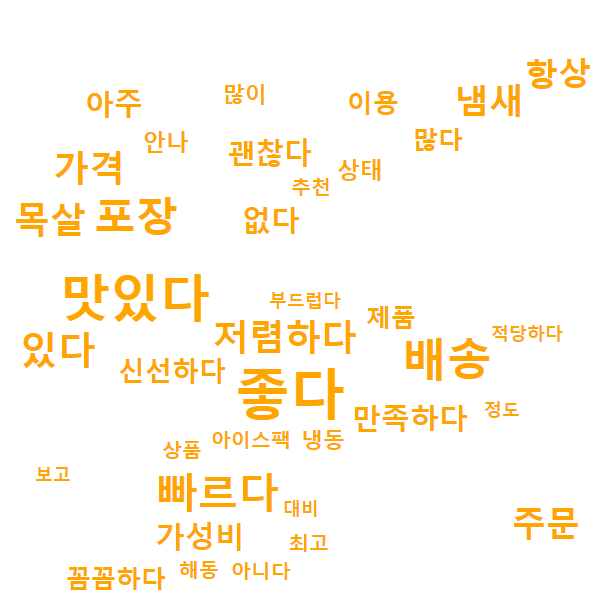

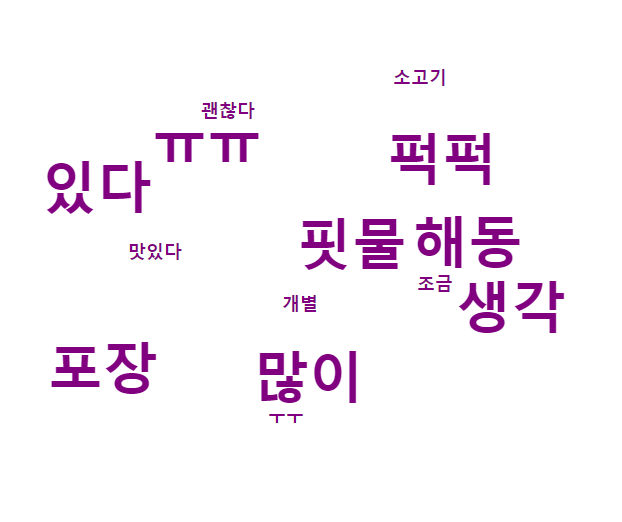